## PCA

### Task 1: Exploratory Data Analysis (EDA):
1.	Load the dataset and perform basic data exploration.
2.	Examine the distribution of features using histograms, box plots, or density plots.
3.	Investigate correlations between features to understand relationships within the data.
### Task 2: Dimensionality Reduction with PCA:
1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
3.	Transform the original dataset into the principal components.
### Task 3: Clustering with Original Data:
1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
2.	Visualize the clustering results using appropriate plots.
3.	Evaluate the clustering performance using metrics such as silhouette score or ###Davies–Bouldin index.
### Task 4: Clustering with PCA Data:
1.	Apply the same clustering algorithm to the PCA-transformed dataset.
2.	Visualize the clustering results obtained from PCA-transformed data.
3.	Compare the clustering results from PCA-transformed data with those from the original dataset.
### Task 5: Comparison and Analysis:
1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
2.	Discuss any similarities or differences observed in the clustering results.
3.	Reflect on the impact of dimensionality reduction on clustering performance.
4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.
### Task 6: Conclusion and Insights


### Task 1: Exploratory Data Analysis (EDA):
1.	Load the dataset and perform basic data exploration.
2.	Examine the distribution of features using histograms, box plots, or density plots.
3.	Investigate correlations between features to understand relationships within the data.


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")


In [63]:
data=pd.read_csv('wine.csv')
df=data.copy()

In [99]:
df.sample(10)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
87,2,11.65,1.67,2.62,26.0,88,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562
154,3,12.58,1.29,2.10,20.0,103,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
19,1,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845
123,2,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380
110,2,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562
163,3,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675
111,2,12.52,2.43,2.17,21.0,88,2.55,2.27,0.26,1.22,2.00,0.90,2.78,325
137,3,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [66]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [67]:
df.duplicated().sum()

np.int64(0)

In [68]:
for i in df.columns :
    print(f"\ncol name is {i}\n")
    print(f"\ncol name is {df[i].unique()}\n")


col name is Type


col name is [1 2 3]


col name is Alcohol


col name is [14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]


col name is Malic


col name is [1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1

In [69]:
df.describe()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [70]:
df.shape

(178, 14)

The dataset contains 178 samples and 13 numerical features. No missing values were observed. The statistical summary indicates varying scales across features, highlighting the need for standardization before applying PCA.

In [71]:
df['Type'].unique()

array([1, 2, 3])

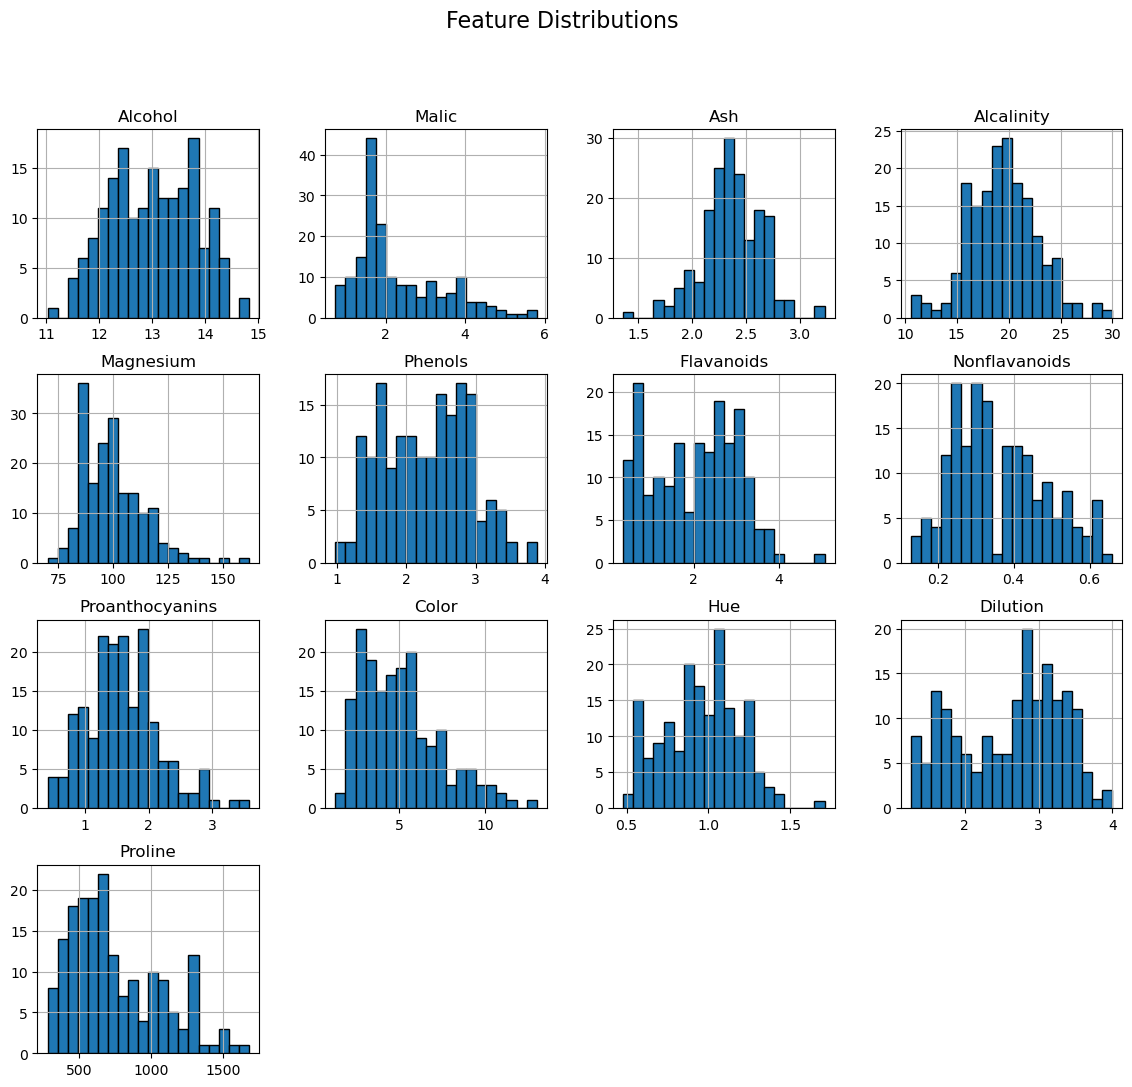

In [72]:
df.drop('Type', axis=1).hist(
    figsize=(14, 12),
    bins=20,
    edgecolor='black'
)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


Right-skewed: Proline, Color

Near-normal: Alcohol, Hue

Different scales → PCA & KMeans affected

In [73]:
# X = df.drop('Type', axis=1)
# y = df['Type']


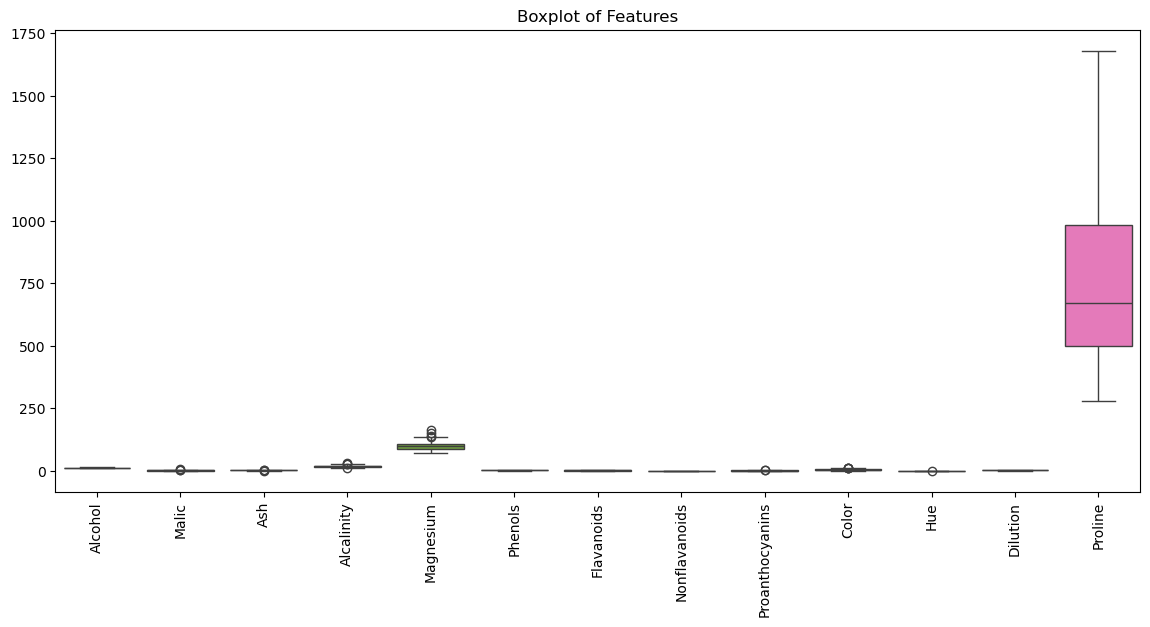

In [74]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df.drop('Type', axis=1))
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.show()


Several features exhibit outliers, particularly Proline and Color Intensity. These outliers likely represent genuine variations in wine characteristics rather than noise.

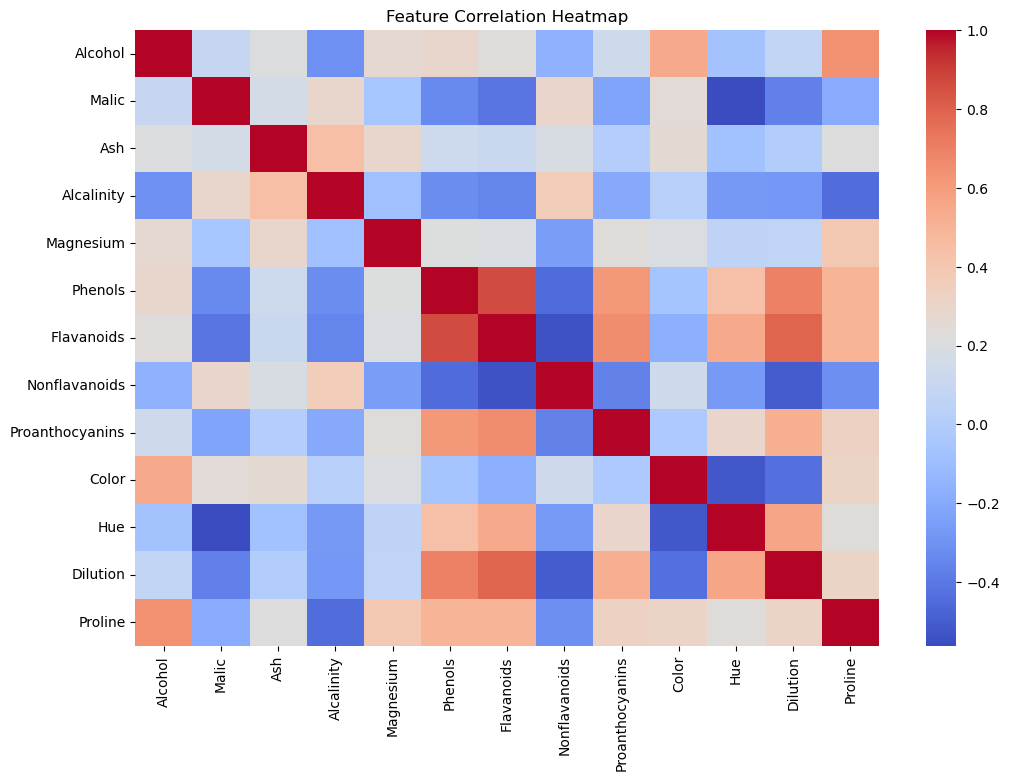

In [75]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df.drop('Type', axis=1).corr(),
    cmap='coolwarm',
    annot=False
)
plt.title("Feature Correlation Heatmap")
plt.show()


Exploratory Data Analysis revealed that the dataset is clean with no missing values and consists entirely of numerical features. Several variables showed skewed distributions and outliers, and strong correlations were observed among chemical attributes. These characteristics make the dataset suitable for dimensionality reduction using PCA, provided that features are standardized.

### Task 2: Dimensionality Reduction with PCA:
1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
3.	Transform the original dataset into the principal components.


In [76]:
from sklearn.preprocessing import StandardScaler

# Separate features and label
X = df.drop('Type', axis=1)
y = df['Type']   # only for later interpretation

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Feature standardization was performed to ensure that all variables have zero mean and unit variance. This step is essential for PCA since it relies on variance to identify principal components.

### Task 3: Clustering with Original Data:
1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
2.	Visualize the clustering results using appropriate plots.
3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.


In [77]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)


In [78]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

explained_variance, cumulative_variance


(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
        0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
        0.01736836, 0.01298233, 0.00795215]),
 array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
        0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
        0.97906553, 0.99204785, 1.        ]))

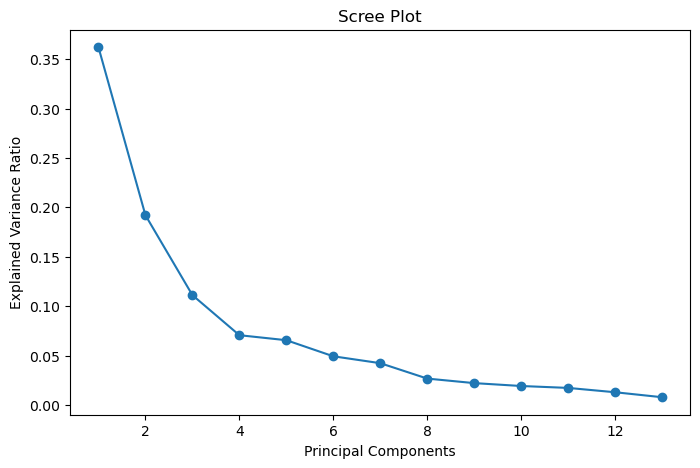

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1),
         explained_variance,
         marker='o')
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.show()


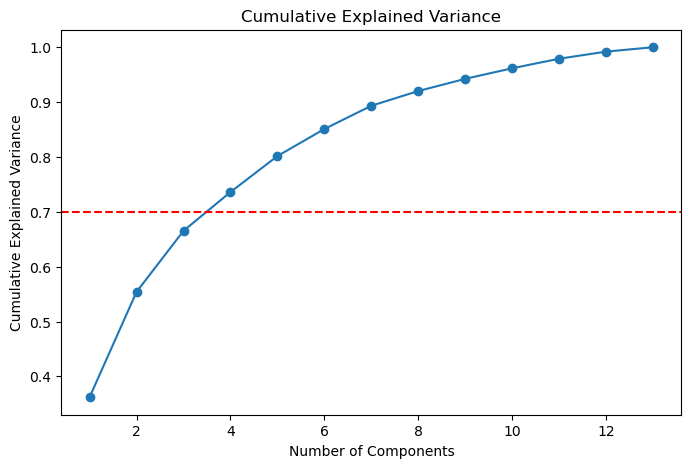

In [80]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1),
         cumulative_variance,
         marker='o')
plt.axhline(y=0.7, color='r', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance")
plt.show()


The scree plot and cumulative explained variance indicate that the first two to three principal components capture a significant portion of the total variance (approximately 65–70%). Therefore, these components were selected for further analysis.

### Task 4: Clustering with PCA Data:
1.	Apply the same clustering algorithm to the PCA-transformed dataset.
2.	Visualize the clustering results obtained from PCA-transformed data.
3.	Compare the clustering results from PCA-transformed data with those from the original dataset.


In [81]:
pca_final = PCA(n_components=2)
X_pca_2D = pca_final.fit_transform(X_scaled)


In [82]:
X_pca_2D

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ],
       [ 3.75706561,  2.75637191],
       [ 1.00890849,  0.86983082],
       [ 3.05025392,  2.12240111],
       [ 2.44908967,  1.17485013],
       [ 2.05943687,  1.60896307],
       [ 2.5108743 ,  0.91807096],
       [ 2.75362819,  0.78943767],
       [ 3.47973668,  1.30233324],
       [ 1.7547529 ,  0.61197723],
       [ 2.11346234,  0.67570634],
       [ 3.45815682,  1.13062988],
       [ 4.31278391,  2.09597558],
       [ 2.3051882 ,  1.66255173],
       [ 2.17195527,  2.32730534],
       [ 1.89897118,  1.63136888],
       [ 3.54198508,  2.51834367],
       [ 2.0845222 ,  1.06113799],
       [ 3.12440254,  0.78689711],
       [ 1.08657007,  0.24174355],
       [ 2.53522408, -0.09184062],
       [ 1.64498834, -0.51627893],
       [ 1.76157587, -0.31714893],
       [ 0.9900791 ,  0.94066734],
       [ 1.77527763,  0.68617513],
       [ 1.23542396, -0.08980704],
       [ 2.18840633,

Redundant chemical features are compressed

Noise reduced

Uncorrelated components created

Distance-based clustering will now perform better

WHY K-Means

Distance-based → works well on standardized numerical data

Efficient & commonly used

Suitable baseline for PCA comparison

In [83]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)


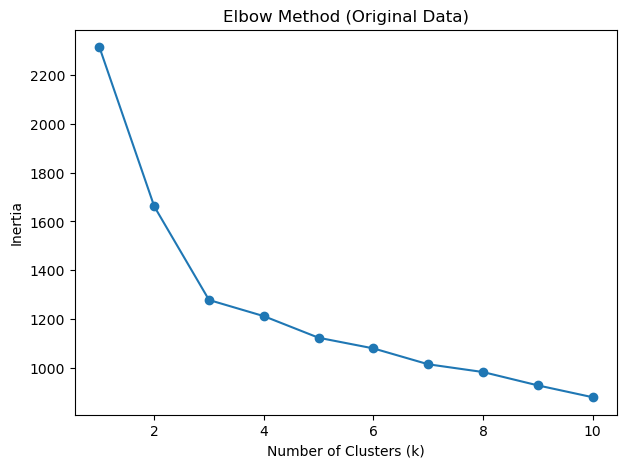

In [84]:
plt.figure(figsize=(7,5))
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method (Original Data)")
plt.show()


In [85]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))


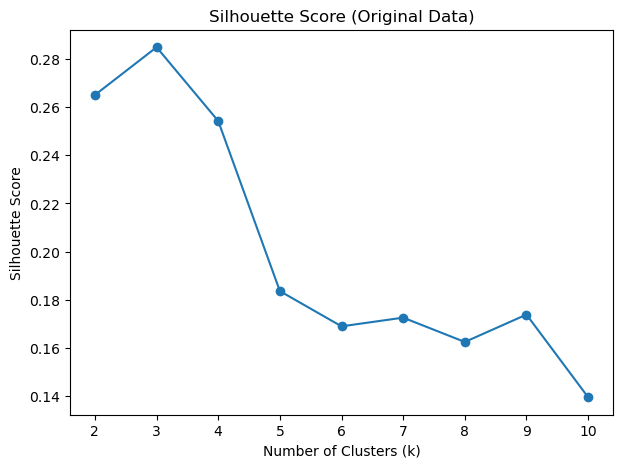

In [86]:
plt.figure(figsize=(7,5))
plt.plot(range(2,11), sil_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score (Original Data)")
plt.show()


In [87]:
kmeans_orig = KMeans(n_clusters=3, random_state=42)
labels_orig = kmeans_orig.fit_predict(X_scaled)


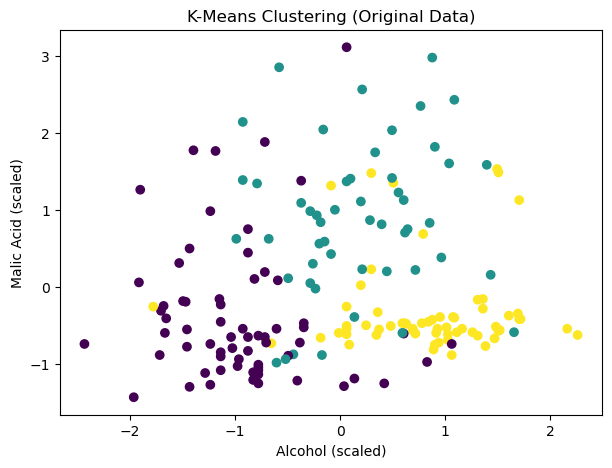

In [88]:
plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
            c=labels_orig, cmap='viridis')
plt.xlabel("Alcohol (scaled)")
plt.ylabel("Malic Acid (scaled)")
plt.title("K-Means Clustering (Original Data)")
plt.show()


In [89]:
silhouette_original = silhouette_score(X_scaled, labels_orig)
silhouette_original


np.float64(0.2848589191898987)

In [90]:
from sklearn.metrics import davies_bouldin_score

db_original = davies_bouldin_score(X_scaled, labels_orig)
db_original


np.float64(1.3891879777181648)

K-Means clustering was applied to the standardized original dataset. The Elbow Method and Silhouette analysis indicated that three clusters were optimal. However, clustering in the original high-dimensional space showed moderate separation, as reflected by evaluation metrics. Visualization was limited due to the high dimensionality of the data.

In [91]:
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca_2D)


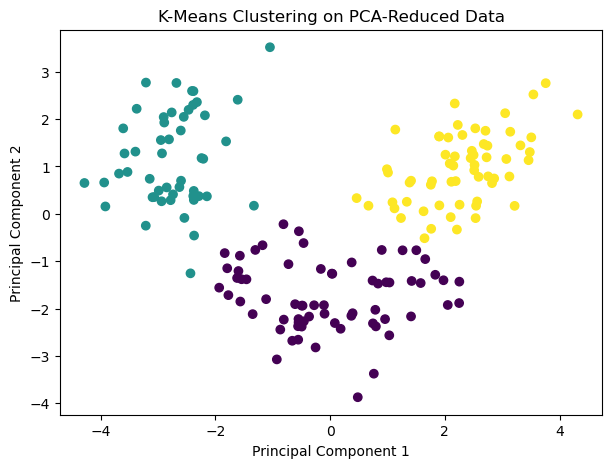

In [92]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca_2D[:, 0], X_pca_2D[:, 1],
            c=labels_pca, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on PCA-Reduced Data")
plt.show()


In [93]:
silhouette_pca = silhouette_score(X_pca_2D, labels_pca)
silhouette_pca


np.float64(0.5601697480957203)

In [94]:
db_pca = davies_bouldin_score(X_pca_2D, labels_pca)
db_pca


np.float64(0.5977226208167409)

PCA improves clustering by removing correlated and noisy dimensions, resulting in better cluster compactness and separation.

The silhouette score obtained for PCA-based clustering was 0.56, indicating a good level of cluster separation and cohesion. Additionally, the Davies–Bouldin index was 0.60, suggesting that clusters are compact with minimal overlap. Compared to clustering on the original dataset, these metrics demonstrate that dimensionality reduction using PCA enhanced the effectiveness of K-Means clustering by removing redundancy and noise.

### Task 5: Comparison and Analysis:
1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
2.	Discuss any similarities or differences observed in the clustering results.
3.	Reflect on the impact of dimensionality reduction on clustering performance.
4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.


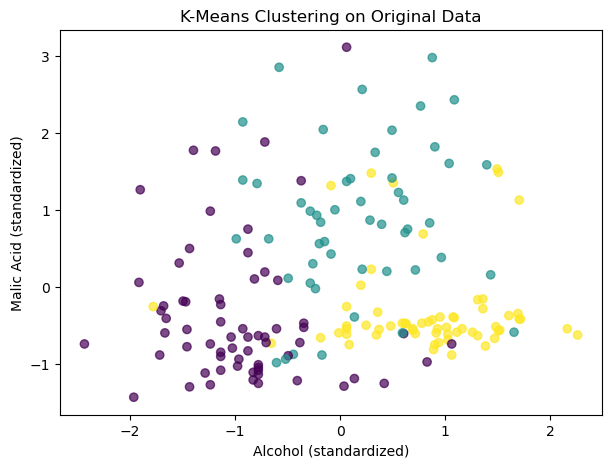

In [95]:
plt.figure(figsize=(7,5))
plt.scatter(
    X_scaled[:, 0], X_scaled[:, 1],
    c=labels_orig,
    cmap='viridis',
    alpha=0.7
)
plt.xlabel("Alcohol (standardized)")
plt.ylabel("Malic Acid (standardized)")
plt.title("K-Means Clustering on Original Data")
plt.show()


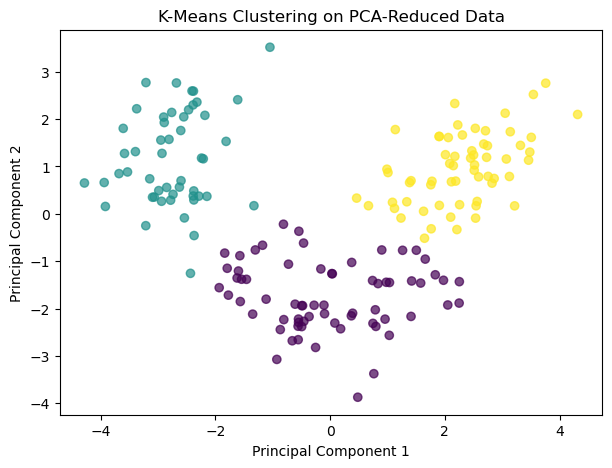

In [96]:
plt.figure(figsize=(7,5))
plt.scatter(
    X_pca_2D[:, 0], X_pca_2D[:, 1],
    c=labels_pca,
    cmap='viridis',
    alpha=0.7
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on PCA-Reduced Data")
plt.show()


Visual comparison of clustering results revealed significant improvement after applying PCA. Clustering on the original dataset showed overlapping clusters and unclear boundaries due to high dimensionality and correlated features. In contrast, clustering on PCA-transformed data resulted in compact and well-separated clusters, clearly visible in the two-dimensional principal component space. These visual observations align with improved silhouette score and Davies–Bouldin index, confirming the effectiveness of PCA in enhancing clustering performance.

### Task 6: Conclusion and Insights

This study demonstrated that applying Principal Component Analysis prior to clustering significantly enhances clustering performance by reducing dimensionality and eliminating redundancy. The PCA-transformed data resulted in more compact and well-separated clusters compared to clustering on the original dataset, as evidenced by improved evaluation metrics. While PCA reduces interpretability, it proves highly beneficial when the primary objective is improved clustering quality and visualization. Therefore, PCA should be considered an essential preprocessing step in unsupervised learning pipelines involving high-dimensional data.